# Plot Temperature Live Read CSV
This example uses a command line program to plot the temperature of the Xilinx Zynq chip.

The simplest way to get the internal Red Pitaya temperature is to use `monitor -ams` as described in the documentation
https://redpitaya.readthedocs.io/en/latest/appsFeatures/command_line_tools/com_line_tool.html#monitor-utility

The results of this can be parsed using the `split` command and selecting item 7.

In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
from datetime import datetime, date
import time
import pandas as pd
from subprocess import run, PIPE

filename = str(date.today()) + " temperature data.csv"

In [2]:
headers = ["Temperature (oC)","Date"]
try:
    df = pd.read_csv(filename,names=headers,skiprows = 1)
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
    df = pd.read_csv(filename, parse_dates=['Date'], date_parser=dateparse,index_col=0)
    df
except:
    df = pd.DataFrame() #Create an empty data frame to append to later
df

,Temperature (oC),Date
0,70.133,2022-08-28 13:08:47.214842
0,70.625,2022-08-28 13:10:06.036922
0,70.502,2022-08-28 13:12:28.858564
0,70.748,2022-08-28 13:14:01.752778


<IPython.core.display.Javascript object>


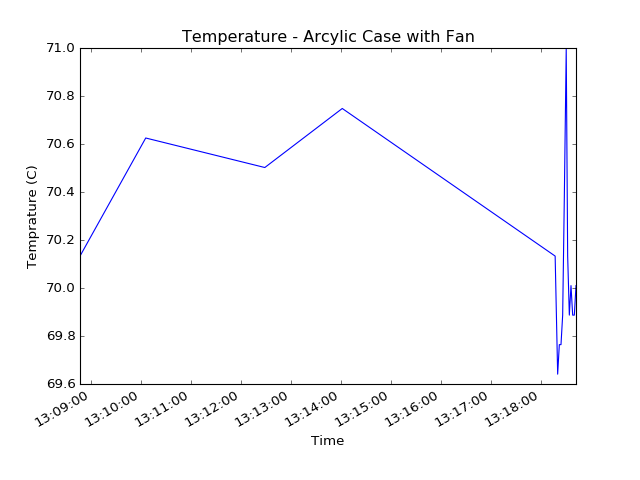

In [3]:
def animate(i):
    global df
    clean_data_table = pd.DataFrame() #Create an empty data frame to append to later
    
    monitor_ams_output = run(["monitor","-ams"], stdout=PIPE).stdout
    temp_value = float(monitor_ams_output.split(maxsplit=8)[7])
    
    clear_output(wait=True)
    display('Collecting temperatures. '+ str(len(df.index)) +' value(s) recorded.')
    clean_data_table['Temperature (oC)'] = [temp_value]
    clean_data_table['Date'] = [datetime.now()]
    df = df.append(clean_data_table)
    
    x = df['Date']
    y1 = df['Temperature (oC)']
    
    plt.cla()
    plt.plot(x,y1)
    plt.xlabel('Time')
    plt.ylabel('Temprature (C)')
    plt.title("Temperature - Arcylic Case with Fan")
    plt.gcf().autofmt_xdate()
    plt.show()
    
ani = FuncAnimation(plt.gcf(), animate,interval=2000)
plt.show()

In [5]:
df[headers] #Make sure the DataFrame is in the correct order
df.to_csv(filename,names=headers)
df

,Temperature (oC),Date
0,70.133,2022-08-28 13:08:47.214842
0,70.625,2022-08-28 13:10:06.036922
0,70.502,2022-08-28 13:12:28.858564
0,70.748,2022-08-28 13:14:01.752778
0,70.133,2022-08-28 13:18:17.059421
0,69.641,2022-08-28 13:18:20.075400
0,69.764,2022-08-28 13:18:22.069342
0,69.764,2022-08-28 13:18:24.070098
0,69.887,2022-08-28 13:18:26.079257
0,70.379,2022-08-28 13:18:28.074360
